In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/thesis_work/bn_stopwords/' 
stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/thesis_work/dataset/BanglaNewsCommentData.csv',encoding='UTF-8')

data.head(10)



,Unnamed: 0,Comment,Tag
0,0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,0
1,1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,0
2,2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,0
3,3,চুরি নয় লুটপাট।,0
4,4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,2
5,5,একটা ভাল প্রতিষ্ঠান কিভাবে লুট হয়ে যাচেছ!,0
6,6,সরকার যাদের এই ব্যাংকে নিয়গ দিয়েছে তারা ব্যাংক...,0
7,7,পুরোপুরি আওয়ামীকরন হলেই আর এর অসতিতই থাকবেক না!,0
8,8,এককথায় ব্যাংকটিতে ডাকাতি হয়েছে এবং হতেই থাকবে।,0
9,9,ইসলামি ব্যাংক প্রারম্ভ থেকেই গ্রাহকদের পছন্দের...,0


In [ ]:
data = data.drop(columns = ['Unnamed: 0'])



In [ ]:
data.head(10)

,Comment,Tag
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,0
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,0
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,0
3,চুরি নয় লুটপাট।,0
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,2
5,একটা ভাল প্রতিষ্ঠান কিভাবে লুট হয়ে যাচেছ!,0
6,সরকার যাদের এই ব্যাংকে নিয়গ দিয়েছে তারা ব্যাংক...,0
7,পুরোপুরি আওয়ামীকরন হলেই আর এর অসতিতই থাকবেক না!,0
8,এককথায় ব্যাংকটিতে ডাকাতি হয়েছে এবং হতেই থাকবে।,0
9,ইসলামি ব্যাংক প্রারম্ভ থেকেই গ্রাহকদের পছন্দের...,0


In [ ]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Tag ==0]),
      "\nTotal Negative Reviews:",len(data[data.Tag==1]),
      "\nTotal Neutral Reviews:",len(data[data.Tag ==2]))

Total Reviews: 13802 
Total Positive Reviews: 7126 
Total Negative Reviews: 3725 
Total Neutral Reviews: 2951


In [ ]:
data.columns

Index(['Comment', 'Tag'], dtype='object')

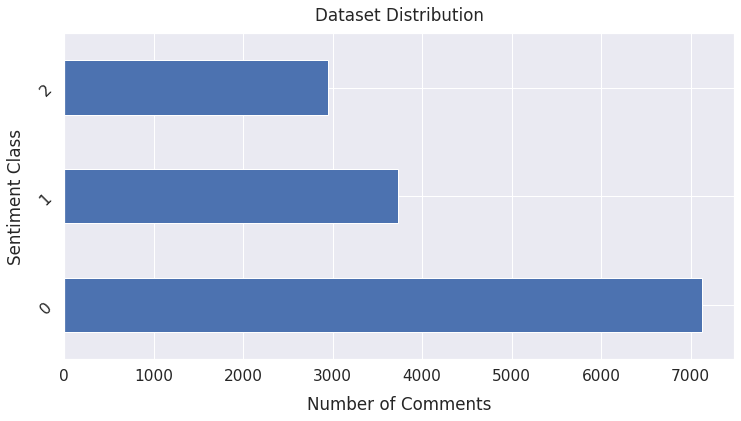

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set(font_scale=1.4)
data['Tag'].value_counts().plot(kind='barh', figsize=(12, 6))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);
plt.show()
plt.savefig('my_plot2.png')

# New Section

# New Section

In [ ]:
# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.Comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Tag[i],'\n')

Original:
 এরা যেখানেই যাবে সেখানেই চুরি হবে। 
Cleaned:
 এরা যেখানেই যাবে সেখানেই চুরি হবে  
 Sentiment:--  0 

Original:
 নিক্কেই এশিয়ান রিভিউবাংলাদেশের উত্থানের পেছনে শেখ হাসিনা 
Cleaned:
 নিক্কেই এশিয়ান রিভিউবাংলাদেশের উত্থানের পেছনে শেখ হাসিনা 
 Sentiment:--  1 

Original:
 রতনে রতন চেনে 
Cleaned:
 রতনে রতন চেনে 
 Sentiment:--  0 

Original:
 আমেরিকাতে ইমেল না সরাসরি চিঠি পাঠানো হয় । 
Cleaned:
 আমেরিকাতে ইমেল না সরাসরি চিঠি পাঠানো হয়   
 Sentiment:--  0 

Original:
 এই অর্থ পাচারে বাংলাদেশ জড়িত আমি গ্যারান্টি দিয়ে বলতে পারি । এই বড় অর্থ ছাড়ের বিষয়ে বিদেশি ব্যাংক ক্রস চেক করে শতভাগ কনফার্ম হয়ে নেয় । তার পর অর্থ ছাড় করে । 
Cleaned:
 এই অর্থ পাচারে বাংলাদেশ জড়িত আমি গ্যারান্টি দিয়ে বলতে পারি   এই বড় অর্থ ছাড়ের বিষয়ে বিদেশি ব্যাংক ক্রস চেক করে শতভাগ কনফার্ম হয়ে নেয়   তার পর অর্থ ছাড় করে   
 Sentiment:--  1 

Original:
 খবর যেমন পড়ি মন্তব্যগুলিও তেমন পড়ি। আর মন্তব্যকারীদের জ্ঞান বিদ্যা বুদ্ধির দৌড় দেখে হতাশ হই। 
Cleaned:
 খবর যেমন পড়ি মন্তব্যগুলিও তেমন পড়ি  আর মন্তব্যকারীদের জ্ঞান বিদ্য

In [ ]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 25 Small Reviews 
Total Reviews: 13777


In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Tag.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Tag==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Tag==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Tag==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  0
Number of Documents:7122
Number of Words:140498
Number of Unique Words:22632
Most Frequent Words:

না	2663
করে	1463
আর	1454
কি	1377
এই	1096
হবে	911
হয়	785
যে	715
তো	708
টাকা	689

Class Name :  1
Number of Documents:3717
Number of Words:75342
Number of Unique Words:15381
Most Frequent Words:

না	1215
হবে	683
করে	679
এই	627
আর	555
জন্য	524
করা	469
ও	393
করতে	363
কি	335

Class Name :  2
Number of Documents:2938
Number of Words:57185
Number of Unique Words:13206
Most Frequent Words:

না	978
করে	575
কি	515
আর	471
হবে	425
এই	389
হয়	349
করা	315
ও	308
থেকে	268
Total Number of Unique Words:33834


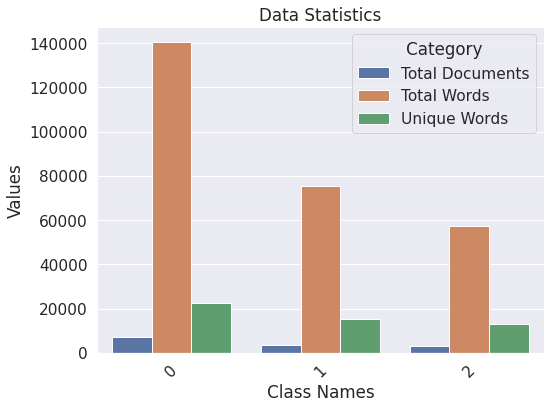

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);
ax.figure.savefig('data_stat.png')

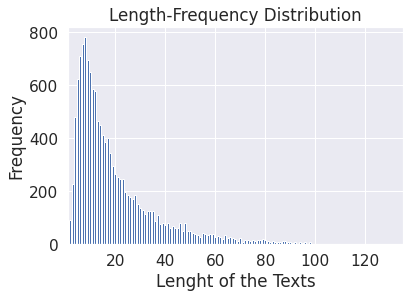

Maximum Length of a review: 118
Minimum Length of a review: 2
Average Length of a reviews: 20.0


<Figure size 432x288 with 0 Axes>

In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
plt.savefig('lengthofreview.png')
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [ ]:
neutral = dataset[dataset.Tag == 0]
negative = dataset[dataset.Tag == 1][:4000]
dataset = neutral.append(negative,ignore_index=True)
dataset.Tag.value_counts()

0    7122
1    3717
Name: Tag, dtype: int64

In [ ]:
#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels
def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

In [ ]:
#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
#============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 

                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

          #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================
            
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Tag,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)

Feature Size :======> 29394

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 10839 
	Training		 9755 
	Test			 1084
Feature Size :======> 180344

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 10839 
	Training		 9755 
	Test			 1084
Feature Size :======> 363492

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 10839 
	Training		 9755 
	Test			 1084


In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     71.96      73.80   35.11     47.59          LR
1     64.67      51.40   46.56     48.87          DT
2     70.85      78.10   27.23     40.38          RF
3     71.31      67.83   39.69     50.08         MNB
4     65.22      52.53   42.24     46.83         KNN
5     68.17      92.86   13.23     23.16  Linear SVM
6     69.93      86.02   20.36     32.92     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by LR at = 71.96000000000001
Highest F1-Score achieved by MNB at = 50.080000000000005
Highest Precision Score achieved by Linear SVM at = 92.86
Highest Recall Score achieved by DT at = 46.56

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     70.02      86.17   20.61     33.26          LR
1     65.87      53.72   42.24     47.29          DT
2     68.63      76.77   19.34     30

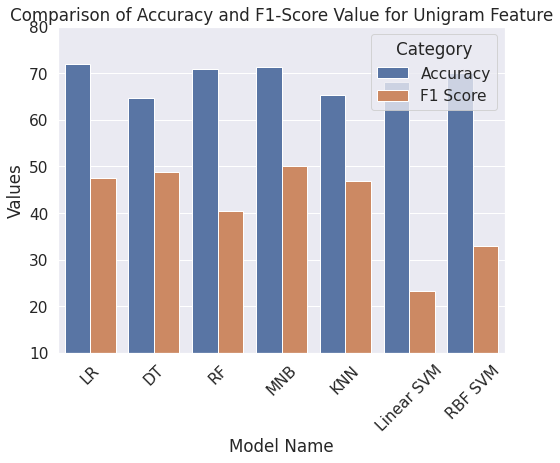

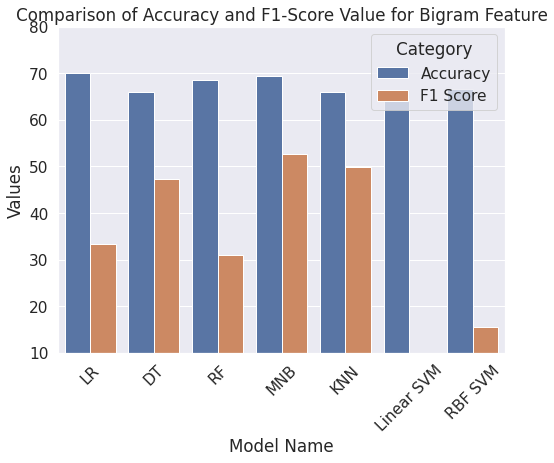

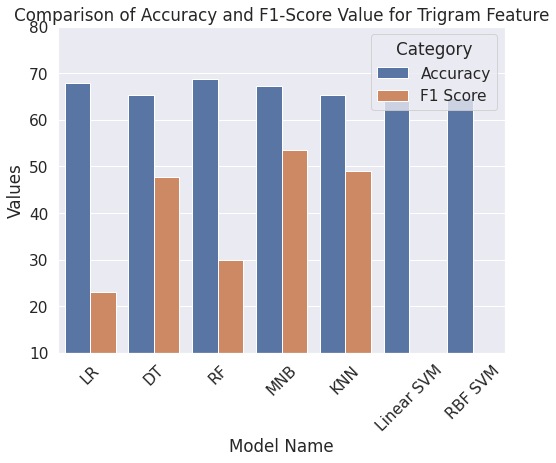

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  it=0
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.figure.savefig('comparison' )
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);
  